In [1]:
import pyvisa
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import device
import func


In [3]:
rm = pyvisa.ResourceManager()
visa_list = rm.list_resources()
print(visa_list)

('TCPIP0::TEKSCOPE-536165::inst0::INSTR', 'TCPIP0::172.20.147.149::inst0::INSTR', 'GPIB0::8::INSTR', 'GPIB0::10::INSTR')


In [29]:
# 機器接続
stage = device.StageController(visa_list[2])#三軸の接続先設定
scope = device.Oscilloscope(visa_list[1])#オシロスコープの接続先指定



IndexError: tuple index out of range

In [4]:
stage.move_one(2,-2000)#2500パルス１㎝
stage.move_one(2,2000)#2500パルス１㎝

428

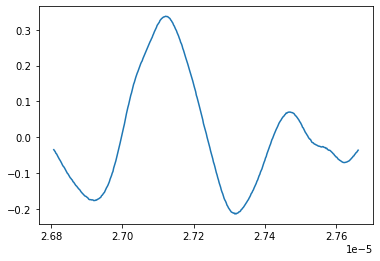

In [5]:
# test
scope = device.Oscilloscope(visa_list[1])#オシロスコープの接続先指定
[times, volts]=scope.fetch(1)
[times, volts] = func.get_cutting_wave(times, volts, 0.1)

plt.plot(times,volts);

len(volts)


In [8]:

func.serch(1,stage,scope)

         0,         1,         0,         0,K,K,R

         0,         0,         0,         0,K,K,R



In [2]:
import pyvisa
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import device
import func


rm = pyvisa.ResourceManager()
visa_list = rm.list_resources()
print(visa_list)

# 機器接続
stage = device.StageController(visa_list[2])#三軸の接続先設定
scope = device.Oscilloscope(visa_list[1])#オシロスコープの接続先指定


def serch(plus_interval, stage, scope):
    position = []
    position.append(stage.status())
    while True:
        center = scope.get_max(1)

        stage.move_to_rel(0, plus_interval, 0, 0)
        time.sleep(5)
        right = scope.get_max(1)

        stage.move_to_rel(0, -2*plus_interval, 0, 0)
        time.sleep(5)
        left = scope.get_max(1)

        stage.move_to_rel(0, plus_interval, plus_interval, 0)
        time.sleep(5)
        up = scope.get_max(1)

        stage.move_to_rel(0, 0, -2*plus_interval, 0)
        time.sleep(5)
        down = scope.get_max(1)

        stage.move_to_rel(0, 0, plus_interval, 0)

        if right > left and right > center:
            stage.move_one(2, plus_interval)

        if left > right and left > center:
            stage.move_one(2, -1*plus_interval)
        time.sleep(1)

        if up > down and up > center:
            stage.move_one(3, plus_interval)

        if down > up and down > center:
            stage.move_one(3, -1*plus_interval)

        latest_position = stage.status()
        print(center,left,right,up,down)
        print(latest_position)

        if latest_position in position:
            break

        position.append(latest_position)



for i in range(4):
    serch(1000/(10**i),stage,scope)
    print(1000/(10**i))

('ASRL1::INSTR', 'ASRL3::INSTR')


IndexError: tuple index out of range

In [ ]:

# pulse_interval = 250 #250 1mm
# stage_range = range(0,2500,pulse_interval)


# data = np.zeros((11,11))

# for x, x_puls in enumerate(stage_range):
#     for y, y_puls in enumerate(stage_range):

#         stage.move_plus(3,pulse_interval)#高さ
        
#         time.sleep(2)#止める時間（アベレージ時間などを考慮）
        
#         [times, volts]=scope.fetch(1)
# #         [time, volts] = func.get_cutting_wave(time, volts, 0.05)
        
#         data[x][y] = max(volts)
#         print(x_puls, y_puls, max(volts))
# #         print(len(times), len(volts))
# #         plt.plot(times, volts) # データ
        
#     stage.move_plus(2,pulse_interval)#奥行
#     time.sleep(0.5)
#     stage.move_minus(3,2500)#高さ

In [ ]:
# # data
# data.max()

# # 1250 2000 0.972234375
# stage.to_zero()
# # time.sleep(1)
# # stage.move_minus(2,1250)
# time.sleep(1)
# stage.move_plus(3,750)

    

In [ ]:
stage.to_zero()
time.sleep(1)
stage.move_minus(3,250)
time.sleep(1)
stage.move_plus(2,250)

In [ ]:
# f = 2.0e6   # 周波数 Hz
# # dt=8e-9

# sf = 10000*f
# # sf = 44100 #サンプリング周波数

# t = np.arange(0, 1/f, 1/sf) #サンプリング点の生成
# # print(1/fs,t)
# y = np.sin(2*np.pi*f*t) # 正弦波の生成

# plt.plot(t,y);



In [10]:

[times, volts]=scope.fetch(1)
a = np.array([times,volts])
np.savetxt('pvdf_10wave.csv', a.T, delimiter=',')